# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math



## Importing the dataset

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
dataset = pd.read_csv('/kaggle/input/ads-ctr-optimisation/Ads_CTR_Optimisation.csv')
dataset.head()
## Goal: to figure out which ad that has the highest conversion rate

/kaggle/input/ads-ctr-optimisation/Ads_CTR_Optimisation.csv


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing UCB

In [3]:
#N=10000 # number of rounds  the ad  has been shown 
N=600 ## OR 600, we can test different number of rounds and find the fastest way
d=10 # number of ads

ads_selected=[]

number_of_selections=[0]*d ## 0, then 1. It will be incremented everytime the ad is selected [0,0,0,0,0,0,0,0,0,0]
# Number of times the ad i was selected up to round n

sum_of_rewards =[0]*d # The sum of rewards of the ad i up to round n [0,0,0,0,0,0,0,0,0,0]

total_reward=0


In [4]:
## Start a For-Loop up to round 10 000
#Our Tasks:
#- 1- Average reward of ad i up to round n
#- 2- the Confidence Interval at round n
#- 3- Select the ad with the highest UCB


for n in range(0,N): # From 0 to 10000
    ## We want to select the ad, start with the first ad
    ad=0 ## it initializes from 0 and then it will go to the ad 1, ad 2, and so on
    max_upper_bound=0  ## we will update this
    
    #Another loop to go through each ad from 1 to 10 (which is d)
    for i in range(0,d): # n is the user
        ## The average reward
        if (number_of_selections[i]>0): # at least one ad has been selected, because we don't want to divide by zero
            average_reward = sum_of_rewards[i] / number_of_selections[i]
            
            delta_i=math.sqrt(3/2 * math.log(n + 1)/number_of_selections[i]) ## Confidence Interval
          
            
            upper_bound=average_reward+delta_i
        else:
            # we have to select the ad, if it was not selected
            upper_bound=1e400 #if that ad was not selected, we select the crazy number
            # Apparently some python trick that developers use
            
        if (upper_bound)>max_upper_bound: ## if the current upper_bound is bigger than the max_upper_bound we update the max_upper_bound
            max_upper_bound=upper_bound 
            ad=i
        # We selected the ad that has not been selected yet
        # We selected the ad with the maximum upper_bound
        
    #Now we need to update everything we have (ads_Selected, numbers_of_selection, sums_of_rewards, total_reward)
    ads_selected.append(ad)
    number_of_selections[ad]+=1 # incrementing the selected ad by 1
    reward=dataset.values[n, ad] #the reward for each user
    sum_of_rewards[ad]=sum_of_rewards[ad]+reward 
    total_reward=total_reward+reward
        
    


## Visualising the results

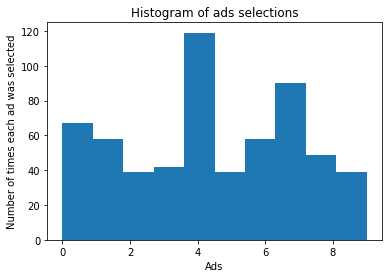

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [6]:
## The ad4 has the highest CTR in comparison with others

In [7]:
## We need to experiment in which rounds we can identify

# N=10000 --> N=5000
# 500 is already hard to say, not enough to identify the best ad

#600 is already better